# Implementing discrete 2d image convolution with matrix multiplication

Sources:

* [ai.stackexchange](https://ai.stackexchange.com/questions/11172/how-can-the-convolution-operation-be-implemented-as-a-matrix-multiplication)

![Stack Exchange screenshot](./media/screenshot_stack_exchange.png)

In [3]:
import numpy as np
import scipy

In [4]:
def convolve(
    kernel: np.array,
    image: np.array,
):
    print(len(kernel.shape))
    assert(len(kernel.shape) == 2)
    assert(kernel.shape[0] == kernel.shape[1])
    assert(len(image.shape) == 2)
    assert(image.shape[0] == image.shape[1])
    
    def _construct_circulant_matrix():
        num_interleaved_zeros = image.shape[0] - kernel.shape[0]
        num_trailing_zeros = image.shape[0]
        first_row = [list(kernel[i]) + [0 for _ in range(num_interleaved_zeros)] for i in range(kernel.shape[0])] + [[0 for _ in range(num_trailing_zeros)]]
        print("1", first_row)
        first_row = [first_row[r][c] for r in range(len(first_row)) for c in range(len(first_row[0]))]
        print("2", first_row)
        first_row = np.array(first_row)
        print("3", first_row)
        #first_row = np.reshape((kernel.shape[0] + num_interleaved_zeros)*(kernel.shape[0] + num_interleaved_zeros), first_row,)
        #print("4", first_row)
        circulant_matrix = scipy.linalg.circulant(first_row)
        print("type(circulant_matrix)", type(circulant_matrix))
        return circulant_matrix
    
    def _flatten_image(image):
        print("&image", image, type(image), image.shape)
        print("&type(image.shape[0]*image.shape[0])", type(image.shape[0]*image.shape[0]), image.shape[0]*image.shape[0])
        image = np.reshape(image, image.shape[0]*image.shape[0])
        return image
    
    def _compute_product(circulant_matrix, flattened_image):
        print("circulant_matrix.shape", circulant_matrix.shape)
        print("flattened_image.shape", flattened_image.shape)
        return np.matmul(circulant_matrix, flattened_image)
    
    circulant_matrix = _construct_circulant_matrix()
    flattened_image = _flatten_image(image)
    product = _compute_product(circulant_matrix, flattened_image)
    print("&product", product)
    
    return circulant_matrix, flattened_image, product

In [5]:
kernel = np.array(
    [
        np.array([0, 1, 0]),
        np.array([0, 1, 0]),
        np.array([0, 1, 0]),
    ]
)

image = np.array(
    [
        np.array([0, 1, 1, 1]),
        np.array([0, 1, 0, 1]),
        np.array([0, 1, 0, 1]),
        np.array([0, 1, 1, 1]),
    ]
)
circulant_matrix, flattened_image, product = convolve(kernel, image)

2
1 [[0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0]]
2 [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
3 [0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
type(circulant_matrix) <class 'numpy.ndarray'>
&image [[0 1 1 1]
 [0 1 0 1]
 [0 1 0 1]
 [0 1 1 1]] <class 'numpy.ndarray'> (4, 4)
&type(image.shape[0]*image.shape[0]) <class 'int'> 16
circulant_matrix.shape (16, 16)
flattened_image.shape (16,)
&product [3 0 3 2 3 0 3 2 3 0 3 1 3 0 3 1]


In [6]:
type(product)

numpy.ndarray

In [7]:
product[0]

3

In [11]:
product = np.reshape(product, (4, 4))

In [12]:
product

array([[3, 0, 3, 2],
       [3, 0, 3, 2],
       [3, 0, 3, 1],
       [3, 0, 3, 1]])

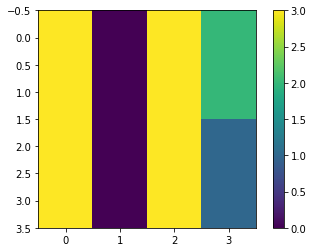

In [13]:
import matplotlib.pyplot as plt

plt.imshow(product)
plt.colorbar()
plt.show()